In [1]:
#importing necessary libraries 
import pandas as pd 

In [2]:
dataSet = pd.read_excel('./satisfaction.xlsx')
dataSet.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
#feature selection process - missing value ratio 
missing_val_col = dataSet.isnull().sum()
missing_val_col = missing_val_col.astype('float')
percent_missing = (missing_val_col / len(dataSet)) * 100
to_drop = percent_missing[percent_missing > 0.20].index
dataSet = dataSet.drop(to_drop, axis = 1)
dataSet

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,4,2,3,3,0,3,5,3,2,0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,0,2,2,3,3,4,4,4,2,0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,4,3,1,1,0,1,4,1,3,0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,1,3,2,3,3,1,2,1,174
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,2,4,4,3,4,2,3,2,155
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,2,3,3,2,3,2,1,2,193


In [4]:
# the discrete values through ratings tell us more about flight experience than passenger demographics (want to explore solely in flight experience )
dataSet.describe()
dataSet.dtypes
dataSet_int = dataSet.select_dtypes(include=['int64'])
dataSet_int.describe() # gives some summary statistics of variables that need to be discretized 

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [5]:
# discretizing variables in the dataSet pandas dataframe 
# starting with age - will discretize age into different bins then remove the age column 
# maybe shouldn't discretize since deci
#age_label = ['childhood/teenager','early adult', 'middle aged adult', 'senior citizen']
#bins = [12, 19, 30, 55, 100]
#dataSet['age_binned'] = pd.cut(dataSet['Age'], bins = bins, labels = age_label)
#dataSet = dataSet.drop('Age', axis = 1)
#dataSet

In [6]:
# performing mutual information classification to see what features might be better to use 
dataSet_int.drop('id', inplace = True, axis = 1)
dataSet_int

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0
129876,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174
129877,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155
129878,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193


In [7]:
# calculating the mutual information scores between feature variables and satisfaction labels 
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(dataSet_int, dataSet['satisfaction_v2']) # mi scores with threshold over 0.05 will be used 
mi_scores = pd.Series(mi_scores, name="MI Scores", index=dataSet_int.columns) # so we can see all the mi scores
mi_scores = mi_scores.sort_values(ascending=False) # sorts the mi scores for us to see 
mi_scores

Inflight entertainment               0.163642
Ease of Online booking               0.114704
Online support                       0.100354
Seat comfort                         0.100133
Online boarding                      0.072200
On-board service                     0.070589
Leg room service                     0.062779
Baggage handling                     0.054926
Cleanliness                          0.051673
Checkin service                      0.038521
Inflight wifi service                0.035705
Food and drink                       0.030252
Flight Distance                      0.029878
Age                                  0.021854
Gate location                        0.009974
Departure/Arrival time convenient    0.005866
Departure Delay in Minutes           0.004301
Name: MI Scores, dtype: float64

In [8]:
# creating dataFrames and preparing data for decision tree classification 
selected_feat = mi_scores[mi_scores >= 0.07].index
final_feat = dataSet_int[selected_feat]
labels = dataSet['satisfaction_v2']
labels.value_counts() # to see if stratification or class balancing needs to be done 

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64

                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.90      0.87     11792
              satisfied       0.91      0.85      0.88     14184

               accuracy                           0.87     25976
              macro avg       0.87      0.88      0.87     25976
           weighted avg       0.88      0.87      0.87     25976

[0.90906991 0.76362796 0.8657607  0.84258546 0.80489683]


[Text(0.4639830508474576, 0.9166666666666666, 'x[0] <= 3.5\ngini = 0.495\nsamples = 103904\nvalue = [47001, 56903]'),
 Text(0.19915254237288135, 0.75, 'x[3] <= 3.5\ngini = 0.339\nsamples = 46561\nvalue = [36492, 10069]'),
 Text(0.07627118644067797, 0.5833333333333334, 'x[3] <= 0.5\ngini = 0.248\nsamples = 40661\nvalue = [34765, 5896]'),
 Text(0.03389830508474576, 0.4166666666666667, 'x[4] <= 0.5\ngini = 0.006\nsamples = 2135\nvalue = [6, 2129]'),
 Text(0.01694915254237288, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.05084745762711865, 0.25, 'gini = 0.0\nsamples = 2129\nvalue = [0, 2129]'),
 Text(0.11864406779661017, 0.4166666666666667, 'x[5] <= 3.5\ngini = 0.176\nsamples = 38526\nvalue = [34759, 3767]'),
 Text(0.0847457627118644, 0.25, 'x[1] <= 1.5\ngini = 0.09\nsamples = 23112\nvalue = [22025, 1087]'),
 Text(0.06779661016949153, 0.08333333333333333, 'gini = 0.017\nsamples = 4408\nvalue = [4371, 37]'),
 Text(0.1016949152542373, 0.08333333333333333, 'gini = 0.106\nsamples 

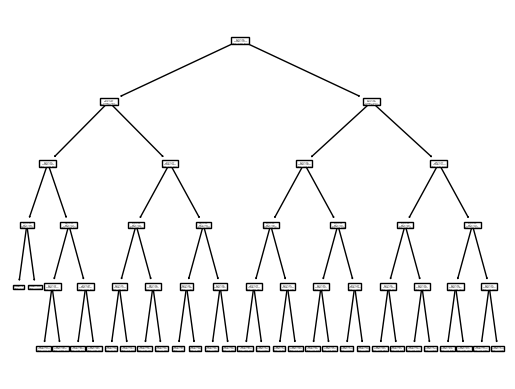

In [9]:
# decision tree classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
X_train, X_test, Y_train, Y_test = train_test_split(final_feat, labels, test_size = 0.20, random_state = 22)
decTree = DecisionTreeClassifier(min_samples_split = 20, max_depth = 5)
decTree.fit(X_train, Y_train) # fit the decision tree classifier 
y_pred = decTree.predict(X_test)
print(classification_report(Y_test, y_pred))
print(cross_val_score(decTree, final_feat, labels, cv=5))
plot_tree(decTree)

In [10]:
#performing support vector machines on all of the different quantitative variables 
from sklearn import svm 
from sklearn.preprocessing import Normalizer 
#feat = dataSet_int[['Age', 'Flight Distance', 'Departure Delay in Minutes']] # want to work with unexamined categorical features
#normalizer = Normalizer(norm = 'l2')
#normalizer.fit(final_feat)
#feat = normalizer.transform(final_feat)
#feat
#X_train, X_test, Y_train, Y_test = train_test_split(dataSet_int, labels, test_size = 0.20, random_state = 22)
#svmClassifier = svm.SVC() # SVM classifier 
#svmClassifier.fit(X_train, Y_train)
#y_pred = svmClassifier.predict(Y_train)
#print(classification_report(Y_test, y_pred))
#print(cross_val_score(svmClassifier, dataSet_int, labels, cv=5))
feat = final_feat



In [11]:
# performing kNN on the data to see if that helps 
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(feat, labels, test_size = 0.20, random_state = 22)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)
print(classification_report(Y_test, y_pred))



                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.88      0.88     11792
              satisfied       0.90      0.91      0.90     14184

               accuracy                           0.89     25976
              macro avg       0.89      0.89      0.89     25976
           weighted avg       0.89      0.89      0.89     25976



In [25]:
from sklearn.svm import SVC 
X_train, X_test, Y_train, Y_test = train_test_split(feat, labels, test_size = 0.20, random_state = 22)
svmClassifier = SVC() # SVM classifier 
svmClassifier.fit(X_train, Y_train)
y_pred = svmClassifier.predict(X_test)
print(classification_report(Y_test, y_pred))


                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     11792
              satisfied       0.91      0.90      0.91     14184

               accuracy                           0.90     25976
              macro avg       0.90      0.90      0.90     25976
           weighted avg       0.90      0.90      0.90     25976

